# CDF of Latency

CDF of x ms is 
0.6086863347381956


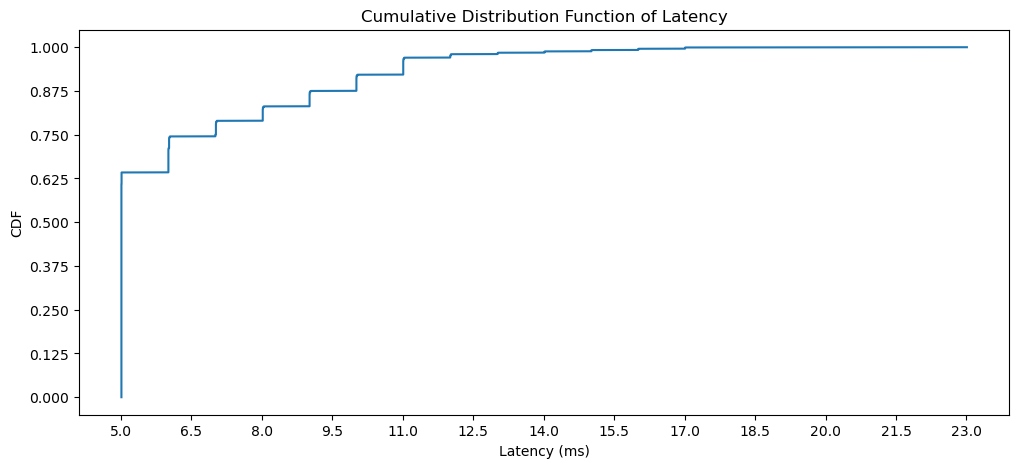

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from pylab import xticks,yticks

file_path = '/Users/kunru.zou/Downloads/bler=0.1,shift=-10.csv'
csv.field_size_limit(500 * 1024 * 1024)

with open(file_path, encoding='utf-8-sig') as f:
    for row in csv.reader(f, skipinitialspace=True):
        if 'meanBitLifeTimePerPacket:vector' in row and not row[6] == '' and not row[7] == '':
           # print(row)
            data = row[7]
f.close()

assert data is not None

data = data.split(' ')
data = [float(i) * 1000 for i in data]
sorted_data = np.sort(data)
cumulative_prob = np.arange(1, len(data) + 1)/float(len(data))

def cdf(data, x):
    length = len([i for i in data if i <= x])
    return length / len(sorted_data)
print('CDF of x ms is ')
print(cdf(data, 5.008494))

plt.figure(figsize=(12, 5))
xticks(np.linspace(5.0,23.0,13))
yticks(np.linspace(0.0,1.0,9))
plt.xlabel('Latency (ms)')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Latency')
plt.plot(sorted_data, cumulative_prob)




plt.show()

# Latency over Sim-time

123
1.006008494 14.998008494
5.008494 23.008494000000002


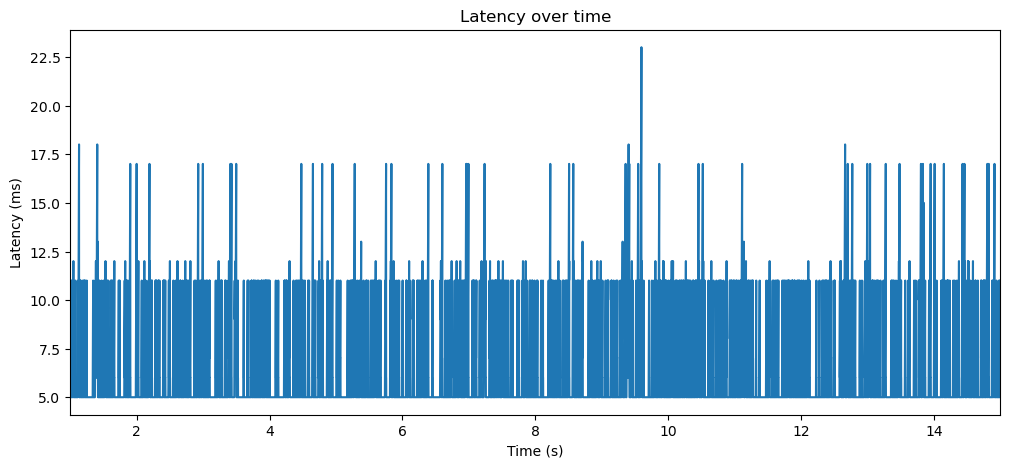

In [9]:
import matplotlib.pyplot as plt
import csv


file_path = '/Users/kunru.zou/Downloads/bler=0.1,shift=-10.csv'
csv.field_size_limit(500 * 1024 * 1024)

with open(file_path, encoding='utf-8-sig') as f:
    for row in csv.reader(f, skipinitialspace=True):
        if 'meanBitLifeTimePerPacket:vector' in row and not row[6] == '' and not row[7] == '':
            #print('123')
            time = row[6]
            data = row[7]
f.close()

assert time is not None
assert data is not None

time = time.split(' ')
data = data.split(' ')
time = [float(i) for i in time]
data = [float(i) * 1000 for i in data]

print(min(time), max(time))
print(min(data), max(data))

plt.figure(figsize=(12, 5))
plt.xlabel('Time (s)')
plt.ylabel('Latency (ms)')
plt.title('Latency over time')
plt.xlim(1, 15)

plt.plot(time, data)

plt.show()